<a href="https://colab.research.google.com/github/kbee181756/Build-Project-1/blob/master/geo_join_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas
!pip install descartes

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 10.4MB 52.0MB/s 
     |████████████████████████████████| 14.7MB 302kB/s 


In [0]:
# Install Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd

In [7]:
from google.colab import files
uploaded = files.upload()

Saving nysd.shp to nysd.shp


In [0]:
nycdoe = gpd.read_file("nysd.shp")

In [9]:
nycdoe.dtypes

geometry    geometry
dtype: object

In [0]:
url_1 = ('https://raw.githubusercontent.com/kbee181756/Build-Project-1/master/LocationMaster.csv?token=AD456YXIQXFXK4SLLFTBIAK6MHDAC')
url_2 = ('https://raw.githubusercontent.com/kbee181756/Build-Project-1/master/demographics.csv?token=AD456YXZMCQAPVYH5K4YXSS6MHDOK')
url_3 = ('https://raw.githubusercontent.com/kbee181756/Build-Project-1/master/cleanlatlong.csv?token=AD456YWK5JH6ITZLYGCGRAS6MVFBG')

In [0]:
location = pd.DataFrame(pd.read_csv(url_1))
data = pd.DataFrame(pd.read_csv(url_2))
long_lat = pd.DataFrame(pd.read_csv(url_3))

In [0]:
location_data = pd.DataFrame(pd.merge(data, location, left_on='DBN', right_on='ATS System Code'))

In [0]:
location_data_longlat = pd.DataFrame(pd.merge(location_data, long_lat, left_on='DBN', right_on='system_code'))

In [0]:
location_data = location_data_longlat.set_index("Location Name")

In [15]:
location_data.head()

,DBN,School Name,Year,Total Enrollment,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,ATS System Code,...,Primary Address,City,State Code,Zip,Principal Name,Geographical District Code,Administrative District Code,Administrative District Location Code,Administrative District Name,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 0,system_code,location_code,location_name,primary_address_line_1,LONGITUDE,LATITUDE
Location Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P.S. 015 Roberto Clemente,01M015,P.S. 015 Roberto Clemente,2013-14,190,26,39,39,21,16,26,23,0,0,0,0,0,0,0,93,48.9,97,51.1,9,4.7,72,37.9,104,54.7,2,1.1,3,1.6,65,34.2,19,10.0,171,90.0,No Data,01M015,...,333 EAST 4 STREET,MANHATTAN,NY,10009,Thomas Staebell,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,709,01M015,M015,P.S. 015 Roberto Clemente,333 EAST 4 STREET,-73.978747,40.722075
P.S. 015 Roberto Clemente,01M015,P.S. 015 Roberto Clemente,2014-15,183,18,27,47,31,19,17,24,0,0,0,0,0,0,0,84,45.9,99,54.1,8,4.4,65,35.5,107,58.5,1,0.5,2,1.1,64,35.0,17,9.3,169,92.3,93.50%,01M015,...,333 EAST 4 STREET,MANHATTAN,NY,10009,Thomas Staebell,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,709,01M015,M015,P.S. 015 Roberto Clemente,333 EAST 4 STREET,-73.978747,40.722075
P.S. 015 Roberto Clemente,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,18,0,0,0,0,0,0,0,83,47.2,93,52.8,9,5.1,57,32.4,105,59.7,3,1.7,2,1.1,60,34.1,16,9.1,149,84.7,89.60%,01M015,...,333 EAST 4 STREET,MANHATTAN,NY,10009,Thomas Staebell,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,709,01M015,M015,P.S. 015 Roberto Clemente,333 EAST 4 STREET,-73.978747,40.722075
P.S. 015 Roberto Clemente,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,18,0,0,0,0,0,0,0,83,46.6,95,53.4,14,7.9,51,28.7,105,59.0,4,2.2,4,2.2,51,28.7,12,6.7,152,85.4,89.20%,01M015,...,333 EAST 4 STREET,MANHATTAN,NY,10009,Thomas Staebell,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,709,01M015,M015,P.S. 015 Roberto Clemente,333 EAST 4 STREET,-73.978747,40.722075
P.S. 015 Roberto Clemente,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,26,0,0,0,0,0,0,0,99,52.1,91,47.9,20,10.5,52,27.4,110,57.9,2,1.1,6,3.2,45,23.7,8,4.2,161,84.7,89.00%,01M015,...,333 EAST 4 STREET,MANHATTAN,NY,10009,Thomas Staebell,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,709,01M015,M015,P.S. 015 Roberto Clemente,333 EAST 4 STREET,-73.978747,40.722075


In [0]:
# Remove Unwanted Columns
location_data= pd.DataFrame(location_data.drop(axis=1, 
                                    columns=['Grade PK (Half Day & Full Day)',
                                            'Grade K', 
                                            'Grade 1', 
                                            'Grade 2', 
                                            'Grade 3', 
                                            'Grade 4', 
                                            'Grade 5', 
                                            'Grade 6', 
                                            'Grade 7', 
                                            'Grade 8', 
                                            'Grade 9', 
                                            'Grade 10', 
                                            'Grade 11', 
                                            'Grade 12', 
                                            'Unnamed: 21', 
                                            'Unnamed: 22',
                                            'Unnamed: 23',
                                            'Unnamed: 24',
                                            'Unnamed: 25',
                                            'Unnamed: 26',
                                            'Unnamed: 27',
                                            'Unnamed: 28',
                                            'Unnamed: 29',
                                            'Unnamed: 30',
                                            'Unnamed: 31',
                                            'Unnamed: 32',
                                            'Unnamed: 33',
                                            'Unnamed: 34',
                                            'Unnamed: 35',
                                            'Unnamed: 36',
                                            'Unnamed: 37',
                                            'Unnamed: 38',
                                            'Unnamed: 39', 
                                            'Unnamed: 40',
                                            'Unnamed: 41',
                                            'Unnamed: 42',
                                            'Unnamed: 43',
                                            'Unnamed: 44',
                                            'Status Description',
                                            'Building Code',
                                            'Managed By Name',
                                            'Location Code',
                                            'BEDS Number',
                                            'Location Type Description',
                                            'Grades Final',
                                            'Administrative District Location Code',
                                            'Administrative District Name']))

In [0]:
# Create new df with year - filter data frame by year
location_data_2017_18 = pd.DataFrame(location_data[location_data["Year"] =='2017-18'])

In [0]:
from shapely.geometry import Point

In [0]:
geometry = [Point(xy) for xy in zip(location_data_2017_18.LONGITUDE, location_data_2017_18.LATITUDE)]

In [20]:
geometry

 ...]

In [0]:
location_data_2017_18 = location_data_2017_18.drop(['LONGITUDE', 'LATITUDE'], axis=1)

In [22]:
location_data_2017_18

,DBN,School Name,Year,Total Enrollment,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,ATS System Code,Location Category Description,Grades,Open Date,Primary Address,City,State Code,Zip,Principal Name,Geographical District Code,Administrative District Code,Unnamed: 0,system_code,location_code,location_name,primary_address_line_1
Location Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P.S. 015 Roberto Clemente,01M015,P.S. 015 Roberto Clemente,2017-18,190,99,52.1,91,47.9,20,10.5,52,27.4,110,57.9,2,1.1,6,3.2,45,23.7,8,4.2,161,84.7,89.00%,01M015,Elementary,"0K,01,02,03,04,05,06,SE",Jul 1 1904,333 EAST 4 STREET,MANHATTAN,NY,10009,Thomas Staebell,1,1,709,01M015,M015,P.S. 015 Roberto Clemente,333 EAST 4 STREET
P.S. 019 Asher Levy,01M019,P.S. 019 Asher Levy,2017-18,257,114,44.4,143,55.6,23,8.9,49,19.1,166,64.6,3,1.2,16,6.2,87,33.9,8,3.1,197,76.7,67.20%,01M019,Elementary,"0K,01,02,03,04,05,SE",Jul 1 1956,185 1 AVENUE,MANHATTAN,NY,10003,Ivan Kushner,1,1,712,01M019,M019,P.S. 019 Asher Levy,185 1 AVENUE
P.S. 020 Anna Silver,01M020,P.S. 020 Anna Silver,2017-18,497,244,49.1,253,50.9,147,29.6,51,10.3,264,53.1,19,3.8,16,3.2,114,22.9,86,17.3,356,71.6,79.20%,01M020,Elementary,"0K,01,02,03,04,05,SE",Jul 1 1963,166 ESSEX STREET,MANHATTAN,NY,10002,James Lee,1,1,713,01M020,M020,P.S. 020 Anna Silver,166 ESSEX STREET
P.S. 034 Franklin D. Roosevelt,01M034,P.S. 034 Franklin D. Roosevelt,2017-18,333,150,45.0,183,55.0,11,3.3,106,31.8,204,61.3,3,0.9,9,2.7,122,36.6,25,7.5,325,97.6,93.90%,01M034,K-8,"0K,01,02,03,04,05,06,07,08,SE",Jul 1 1955,730 EAST 12 STREET,MANHATTAN,NY,10009,Joyce Stallings Harte,1,1,717,01M034,M034,P.S. 034 Franklin D. Roosevelt,730 EAST 12 STREET
P.S. 063 William McKinley,01M063,The STAR Academy - P.S.63,2017-18,203,100,49.3,103,50.7,6,3.0,37,18.2,128,63.1,8,3.9,24,11.8,67,33.0,2,1.0,166,81.8,75.90%,01M063,Elementary,"0K,01,02,03,04,05,SE",Jul 1 1905,121 EAST 3 STREET,MANHATTAN,NY,10009,DARLENE DESPEIGNES,1,1,738,01M063,M063,The STAR Academy - P.S.63,121 EAST 3 STREET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Family Life Academy Charter School,84X705,Family Life Academy Charter School,2017-18,305,178,58.4,127,41.6,3,1.0,62,20.3,237,77.7,2,0.7,1,0.3,26,8.5,76,24.9,275,90.2,88.30%,84X705,Elementary,"0K,01,02,03,04,05,06",Jul 1 2000,14 WEST 170 STREET,BRONX,NY,10452,Marilyn Calo,9,84,2179,84X705,X705,Family Life Academy Charter School,14 WEST 170 STREET
Harriet Tubman Charter School,84X706,Harriet Tubman Charter School,2017-18,680,365,53.7,315,46.3,3,0.4,428,62.9,235,34.6,9,1.3,5,0.7,60,8.8,76,11.2,538,79.1,87.20%,84X706,K-8,"0K,01,02,03,04,05,06,07,08",Jul 1 2000,3565 3 AVENUE,BRONX,NY,10456,Cleveland Person,9,84,2180,84X706,X706,Harriet Tubman Charter School,3565 THIRD AVENUE
Carl C. Icahn Charter School,84X717,Icahn Charter School,2017-18,329,175,53.2,154,46.8,4,1.2,164,49.8,159,48.3,2,0.6,0,0.0,24,7.3,24,7.3,277,84.2,79.60%,84X717,Elementary,"0K,01,02,03,04,05,06,07,08",Jul 1 2000,1525 BROOK AVENUE,BRONX,NY,10457,Jeffrey Litt,9,84,2181,84X717,X717,Icahn Charter School,1506-30 BROOK AVENUE


In [0]:
crs = {'init': 'epsg:4326'}

In [0]:
from geopandas import GeoDataFrame

In [26]:
gdf = GeoDataFrame(location_data_2017_18, crs=crs, geometry=geometry)

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [27]:
gdf

,DBN,School Name,Year,Total Enrollment,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,ATS System Code,Location Category Description,Grades,Open Date,Primary Address,City,State Code,Zip,Principal Name,Geographical District Code,Administrative District Code,Unnamed: 0,system_code,location_code,location_name,primary_address_line_1,geometry
Location Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P.S. 015 Roberto Clemente,01M015,P.S. 015 Roberto Clemente,2017-18,190,99,52.1,91,47.9,20,10.5,52,27.4,110,57.9,2,1.1,6,3.2,45,23.7,8,4.2,161,84.7,89.00%,01M015,Elementary,"0K,01,02,03,04,05,06,SE",Jul 1 1904,333 EAST 4 STREET,MANHATTAN,NY,10009,Thomas Staebell,1,1,709,01M015,M015,P.S. 015 Roberto Clemente,333 EAST 4 STREET,POINT (-73.97875 40.72207)
P.S. 019 Asher Levy,01M019,P.S. 019 Asher Levy,2017-18,257,114,44.4,143,55.6,23,8.9,49,19.1,166,64.6,3,1.2,16,6.2,87,33.9,8,3.1,197,76.7,67.20%,01M019,Elementary,"0K,01,02,03,04,05,SE",Jul 1 1956,185 1 AVENUE,MANHATTAN,NY,10003,Ivan Kushner,1,1,712,01M019,M019,P.S. 019 Asher Levy,185 1 AVENUE,POINT (-73.98450 40.73001)
P.S. 020 Anna Silver,01M020,P.S. 020 Anna Silver,2017-18,497,244,49.1,253,50.9,147,29.6,51,10.3,264,53.1,19,3.8,16,3.2,114,22.9,86,17.3,356,71.6,79.20%,01M020,Elementary,"0K,01,02,03,04,05,SE",Jul 1 1963,166 ESSEX STREET,MANHATTAN,NY,10002,James Lee,1,1,713,01M020,M020,P.S. 020 Anna Silver,166 ESSEX STREET,POINT (-73.98631 40.72131)
P.S. 034 Franklin D. Roosevelt,01M034,P.S. 034 Franklin D. Roosevelt,2017-18,333,150,45.0,183,55.0,11,3.3,106,31.8,204,61.3,3,0.9,9,2.7,122,36.6,25,7.5,325,97.6,93.90%,01M034,K-8,"0K,01,02,03,04,05,06,07,08,SE",Jul 1 1955,730 EAST 12 STREET,MANHATTAN,NY,10009,Joyce Stallings Harte,1,1,717,01M034,M034,P.S. 034 Franklin D. Roosevelt,730 EAST 12 STREET,POINT (-73.97506 40.72601)
P.S. 063 William McKinley,01M063,The STAR Academy - P.S.63,2017-18,203,100,49.3,103,50.7,6,3.0,37,18.2,128,63.1,8,3.9,24,11.8,67,33.0,2,1.0,166,81.8,75.90%,01M063,Elementary,"0K,01,02,03,04,05,SE",Jul 1 1905,121 EAST 3 STREET,MANHATTAN,NY,10009,DARLENE DESPEIGNES,1,1,738,01M063,M063,The STAR Academy - P.S.63,121 EAST 3 STREET,POINT (-73.98621 40.72444)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Family Life Academy Charter School,84X705,Family Life Academy Charter School,2017-18,305,178,58.4,127,41.6,3,1.0,62,20.3,237,77.7,2,0.7,1,0.3,26,8.5,76,24.9,275,90.2,88.30%,84X705,Elementary,"0K,01,02,03,04,05,06",Jul 1 2000,14 WEST 170 STREET,BRONX,NY,10452,Marilyn Calo,9,84,2179,84X705,X705,Family Life Academy Charter School,14 WEST 170 STREET,POINT (-73.91867 40.84026)
Harriet Tubman Charter School,84X706,Harriet Tubman Charter School,2017-18,680,365,53.7,315,46.3,3,0.4,428,62.9,235,34.6,9,1.3,5,0.7,60,8.8,76,11.2,538,79.1,87.20%,84X706,K-8,"0K,01,02,03,04,05,06,07,08",Jul 1 2000,3565 3 AVENUE,BRONX,NY,10456,Cleveland Person,9,84,2180,84X706,X706,Harriet Tubman Charter School,3565 THIRD AVENUE,POINT (-73.90577 40.83233)
Carl C. Icahn Charter School,84X717,Icahn Charter School,2017-18,329,175,53.2,154,46.8,4,1.2,164,49.8,159,48.3,2,0.6,0,0.0,24,7.3,24,7.3,277,84.2,79.60%,84X717,Elementary,"0K,01,02,03,04,05,06,07,08",Jul 1 2000,1525 BROOK AVENUE,BRONX,NY,10457,Jeffrey Litt,9,84,2181,84X717,X717,Icahn Charter School,1506-30 BROOK AVENUE,POINT (-73.90470 40.83865)


In [28]:
gdf.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [30]:
nycdoe.crs = {'init' :'epsg:4326'}

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [31]:
nycdoe.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
nycdoe.columns

Index(['geometry'], dtype='object')

In [33]:
gdf.columns

Index(['DBN', 'School Name', 'Year', 'Total Enrollment', '# Female',
       '% Female', '# Male', '% Male', '# Asian', '% Asian', '# Black',
       '% Black', '# Hispanic', '% Hispanic',
       '# Multiple Race Categories Not Represented',
       '% Multiple Race Categories Not Represented', '# White', '% White',
       '# Students with Disabilities', '% Students with Disabilities',
       '# English Language Learners', '% English Language Learners',
       '# Poverty', '% Poverty', 'Economic Need Index', 'ATS System Code',
       'Location Category Description', 'Grades', 'Open Date',
       'Primary Address', 'City', 'State Code', 'Zip', 'Principal Name',
       'Geographical District Code', 'Administrative District Code',
       'Unnamed: 0', 'system_code', 'location_code', 'location_name',
       'primary_address_line_1', 'geometry'],
      dtype='object')

In [0]:
plt.style.use('fivethirtyeight')

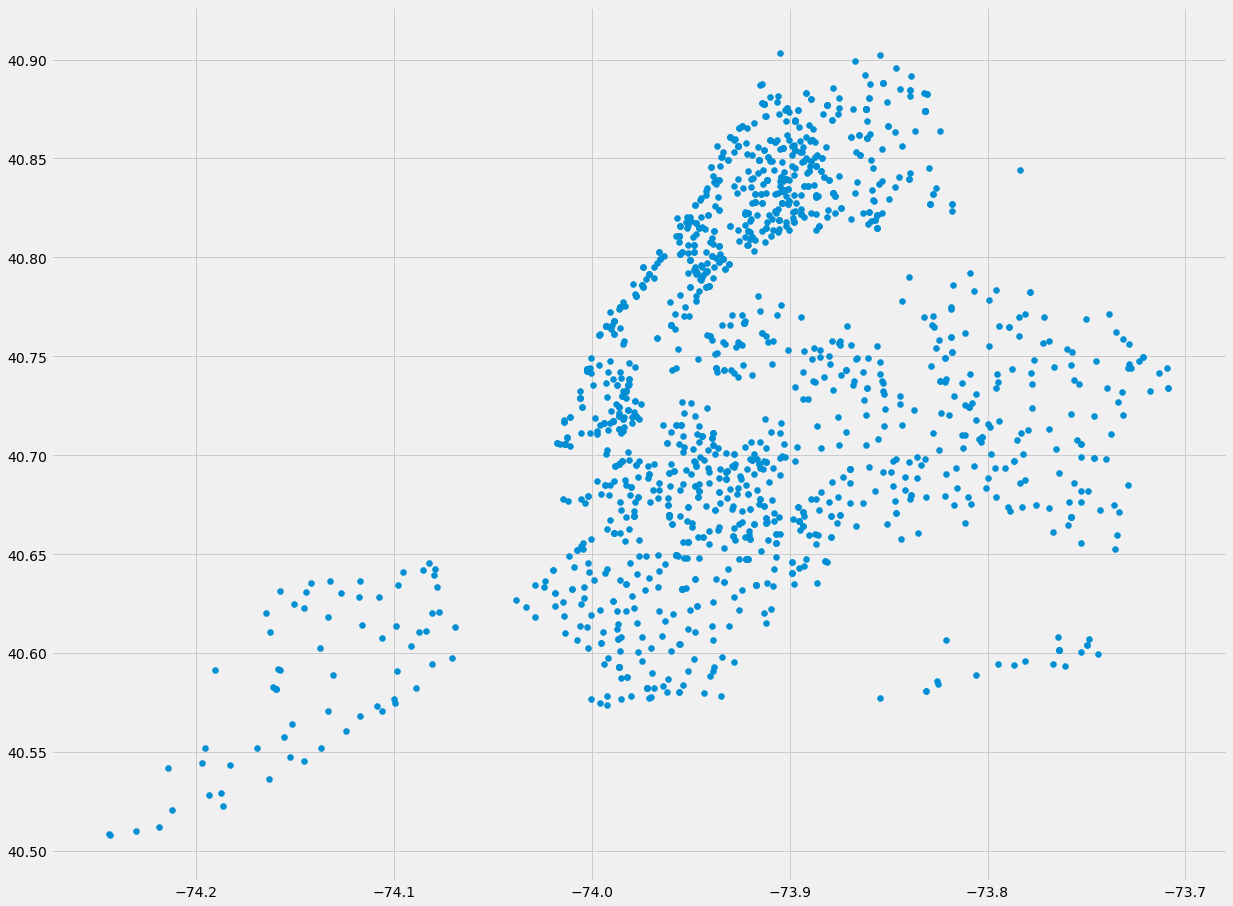

In [38]:
gdf['geometry'].plot(figsize=(20,15));

In [0]:
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt


%matplotlib inline

In [67]:
from google.colab import files
uploaded = files.upload()

Saving geo_export_c4911fb5-e7b5-4583-9f45-5ccacbb19ffe.shp to geo_export_c4911fb5-e7b5-4583-9f45-5ccacbb19ffe (1).shp


In [125]:
from google.colab import files
uploaded = files.upload()

Saving geo_export_029b1c51-7ec0-47a3-bd1c-d9ca83e93cbe.shp to geo_export_029b1c51-7ec0-47a3-bd1c-d9ca83e93cbe (1).shp


In [0]:
school_district = gpd.read_file('geo_export_029b1c51-7ec0-47a3-bd1c-d9ca83e93cbe.shp')

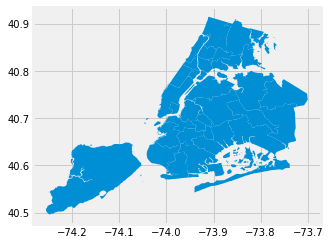

In [131]:
school_district.plot()

In [0]:
street_map = gpd.read_file('geo_export_c4911fb5-e7b5-4583-9f45-5ccacbb19ffe.shp')

In [0]:
crs = {'init': 'espc:4236'}

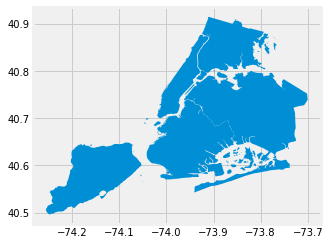

In [74]:
street_map.plot()

In [75]:
street_map.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,2.0,Bronx,1.186612e+09,462958.187332,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
1,5.0,Staten Island,1.623756e+09,325960.628294,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
2,3.0,Brooklyn,1.937593e+09,738745.840717,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,4.0,Queens,3.045878e+09,904188.424111,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
4,1.0,Manhattan,6.366027e+08,361212.476577,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."


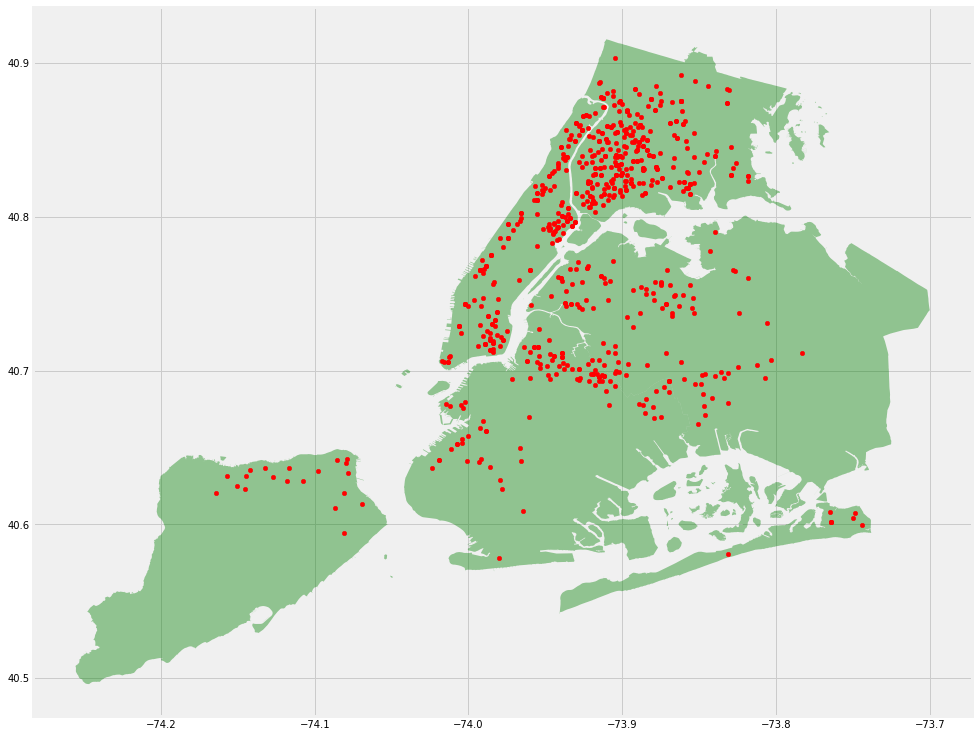

In [90]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='green')

#gdf[gdf['% Black'] > 90].plot(ax=ax, markersize=20, color= 'blue', marker ='o')
gdf[gdf['% Hispanic'] > 40.6].plot(ax=ax, markersize=20, color= 'red', marker ='o')

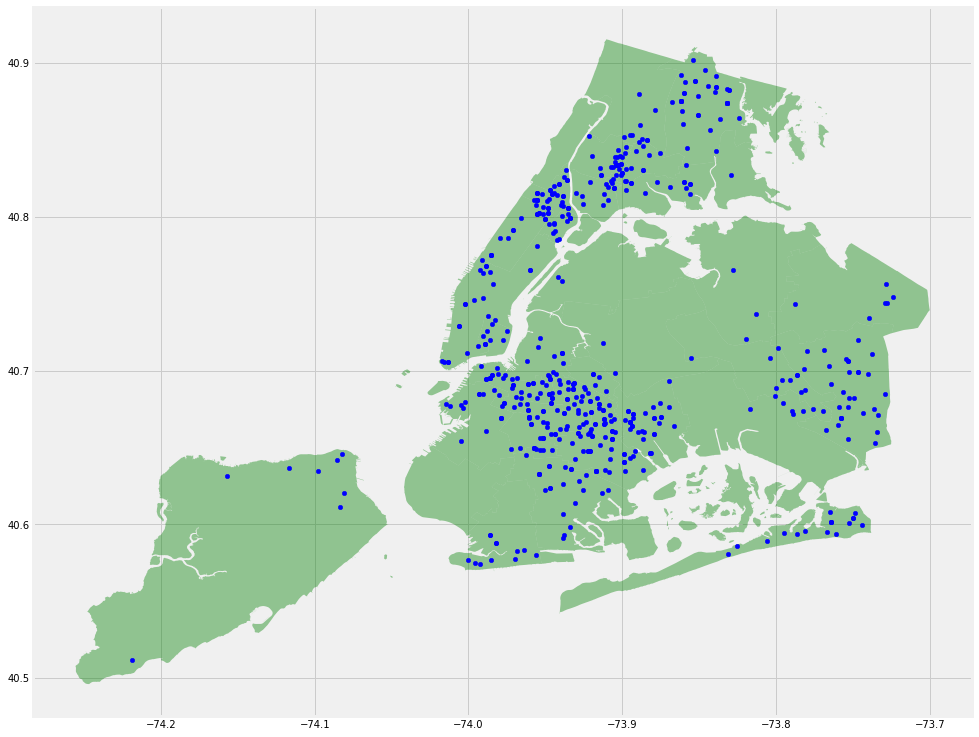

In [133]:
fig, ax = plt.subplots(figsize=(15,15))
school_district.plot(ax=ax, alpha=0.4, color='green')

gdf[gdf['% Black'] > 30].plot(ax=ax, markersize=20, color= 'blue', marker ='o')
#gdf[gdf['% Hispanic'] > 40.6].plot(ax=ax, markersize=20, color= 'red', marker ='o')

In [0]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='green')

#gdf[gdf['% Black'] > 90].plot(ax=ax, markersize=20, color= 'blue', marker ='o')
gdf[gdf['% Hispanic'] > 40.6].plot(ax=ax, markersize=20, color= 'red', marker ='o')

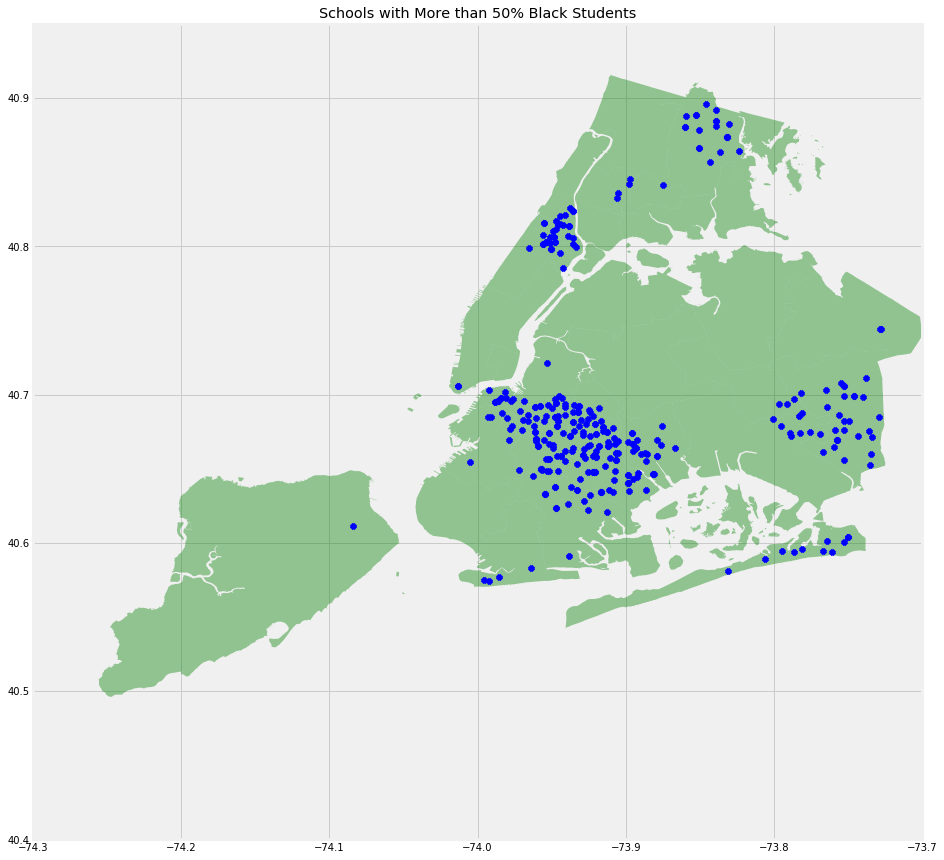

In [137]:
fig, ax = plt.subplots(figsize=(15,15))
school_disctrict.plot(ax=ax, alpha=0.4, color='green')

gdf[gdf['% Black'] > 50].plot(ax=ax, markersize=20, color= 'blue', marker ='x')
plt.title("Schools with More than 50% Black Students")
plt.xlim(-74.3,-73.7)
plt.ylim( 40.4,40.95)
plt.show()


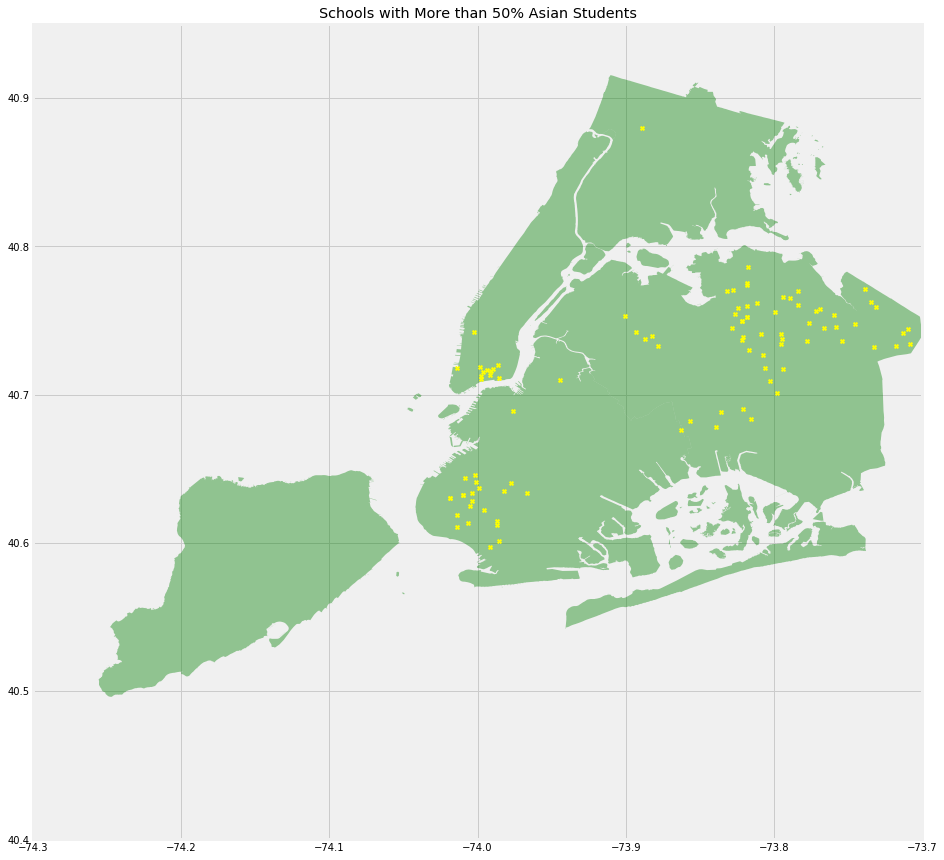

In [115]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='green')

gdf[gdf['% Asian'] > 50].plot(ax=ax, markersize=20, color= 'yellow', marker ='X')
plt.title("Schools with More than 50% Asian Students")
plt.xlim(-74.3,-73.7)
plt.ylim( 40.4,40.95)
plt.show()


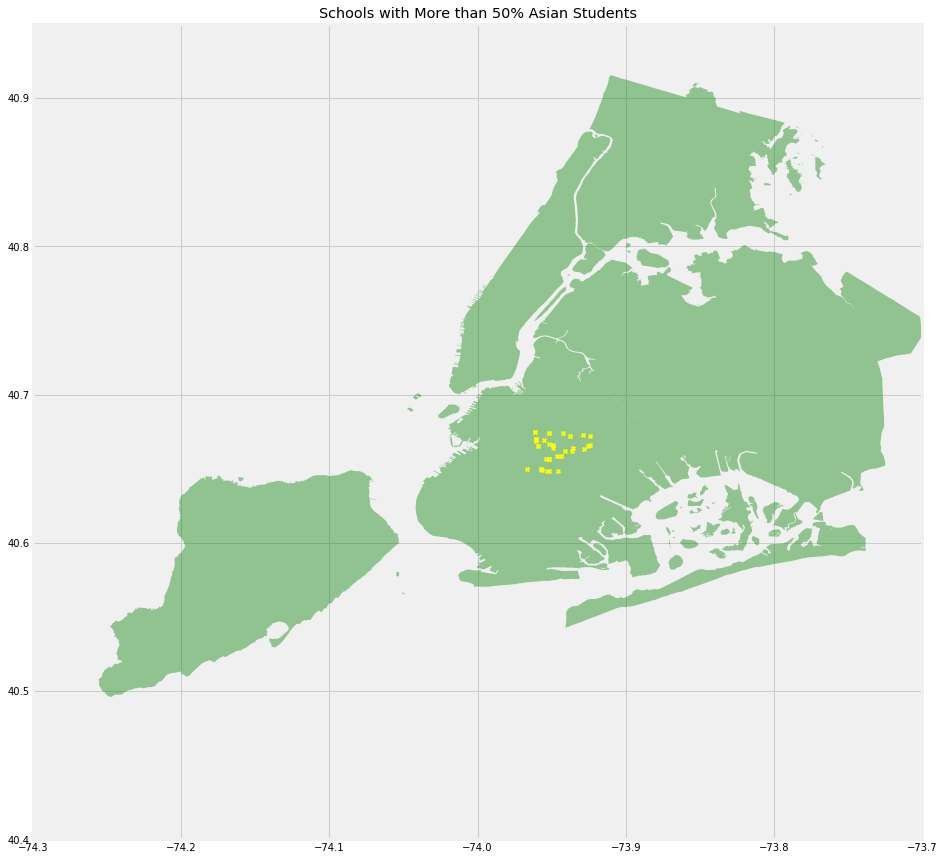

In [141]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='green')

gdf[gdf['Geographical District Code'] == 17].plot(ax=ax, markersize=20, color= 'yellow', marker ='X')
plt.title("Schools with More than 50% Asian Students")
plt.xlim(-74.3,-73.7)
plt.ylim( 40.4,40.95)
plt.show()


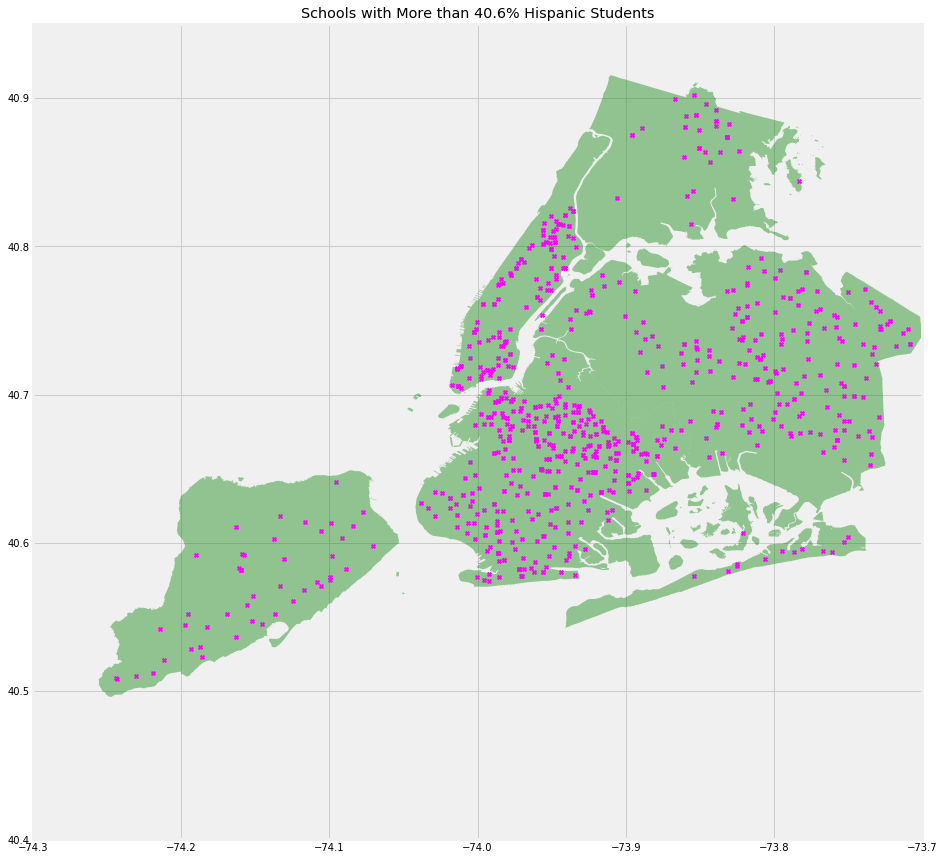

In [116]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='green')

gdf[gdf['% Hispanic'] < 40.6].plot(ax=ax, markersize=20, color= 'magenta', marker ='X')
plt.title("Schools with More than 40.6% Hispanic Students")
plt.xlim(-74.3,-73.7)
plt.ylim( 40.4,40.95)
plt.show()


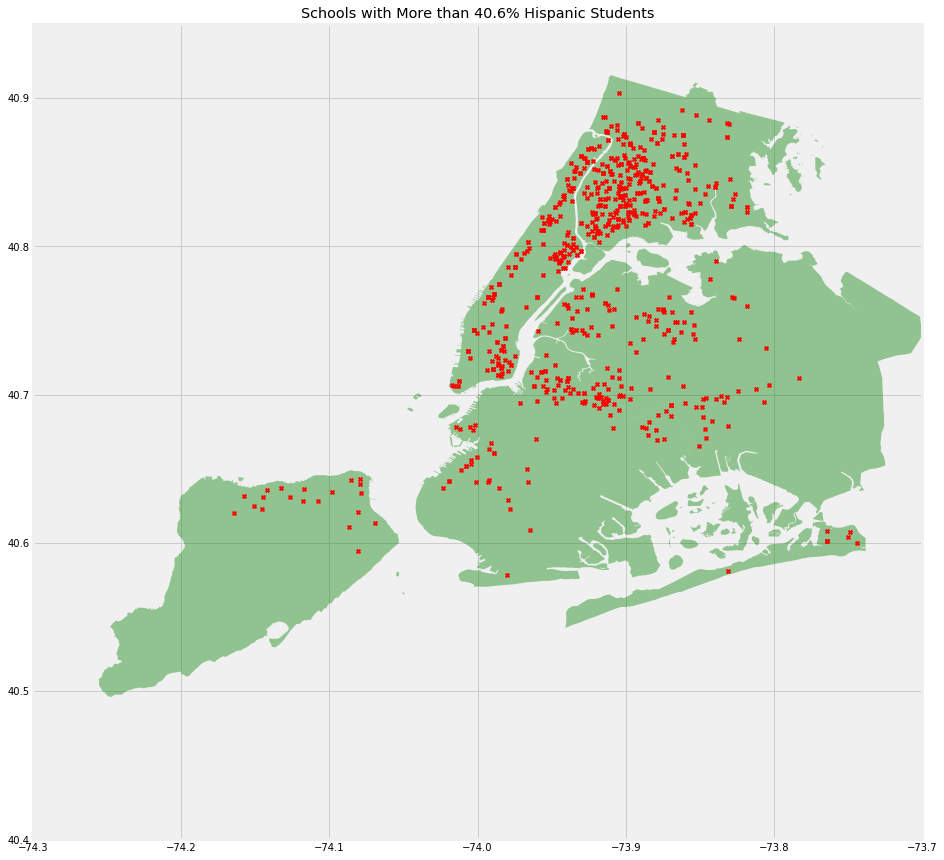

In [117]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='green')

gdf[gdf['% Hispanic'] > 40.6].plot(ax=ax, markersize=20, color= 'red', marker ='X')
plt.title("Schools with More than 40.6% Hispanic Students")
plt.xlim(-74.3,-73.7)
plt.ylim( 40.4,40.95)
plt.show()


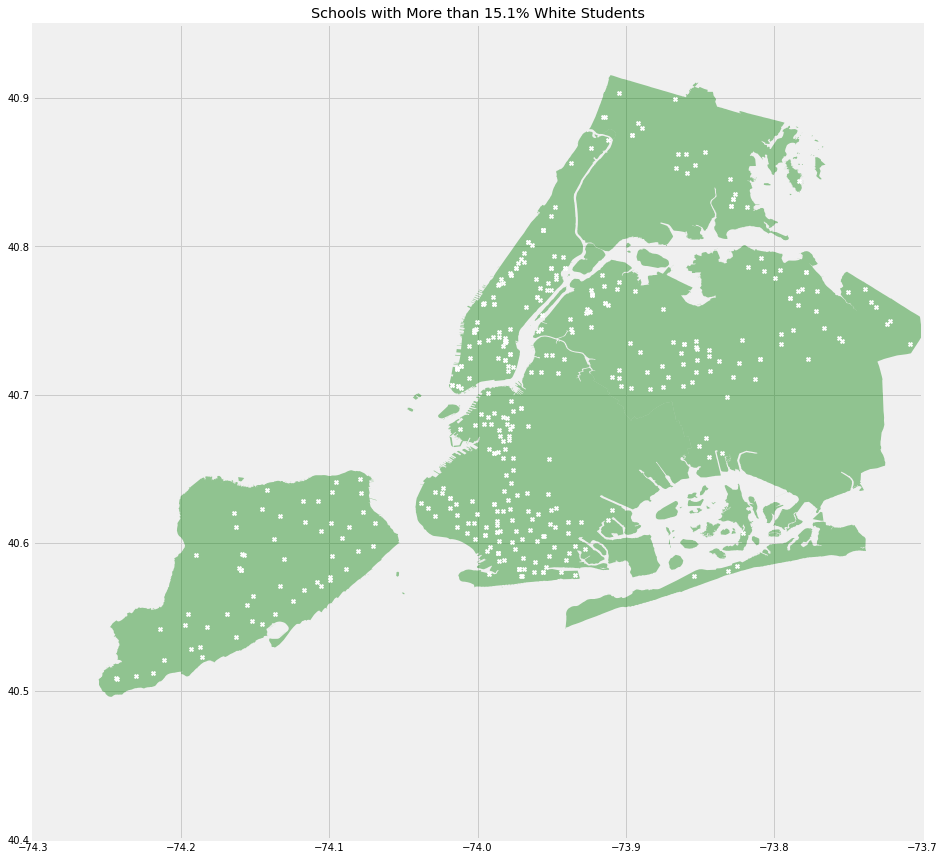

In [119]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='green')

gdf[gdf['% White'] > 15.1].plot(ax=ax, markersize=20, color= 'white', marker ='X')
plt.title("Schools with More than 15.1% White Students")
plt.xlim(-74.3,-73.7)
plt.ylim( 40.4,40.95)
plt.show()


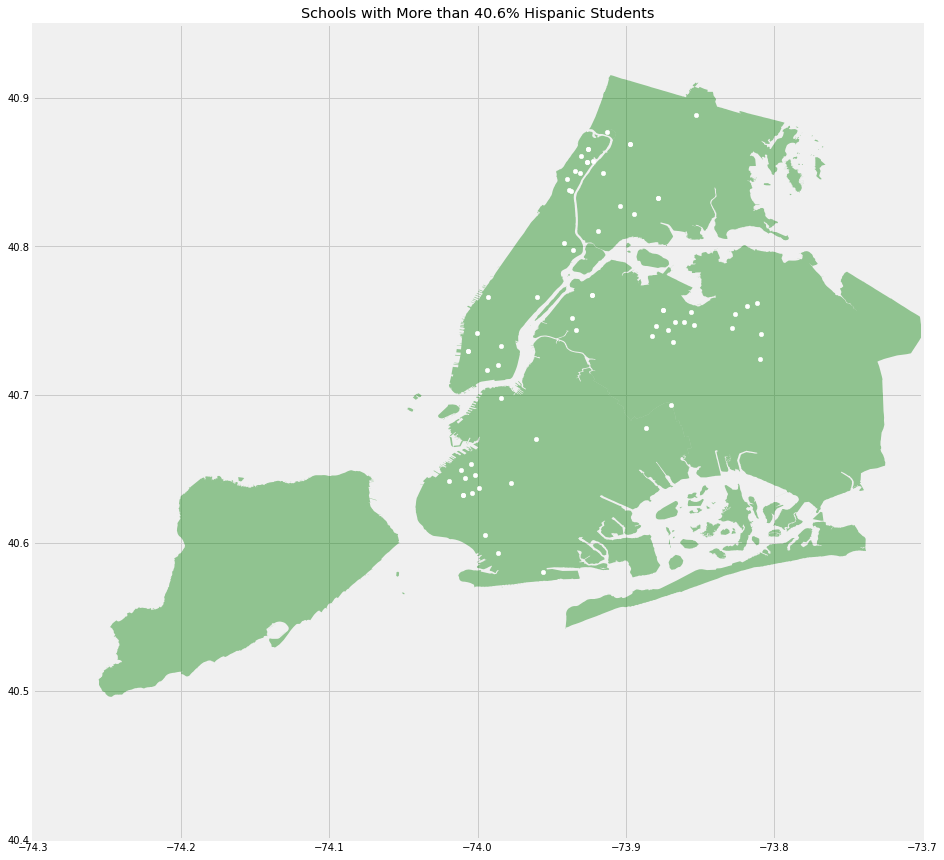

In [124]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='green')

gdf[gdf['% English Language Learners'] > 40].plot(ax=ax, markersize=20, color= 'white', marker ='o')
plt.title("Schools with More than 40.6% Hispanic Students")
plt.xlim(-74.3,-73.7)
plt.ylim( 40.4,40.95)
plt.show()


In [82]:
gdf.plot(column='% Black',ax=ax,alpha=0.5, legend=False,markersize=10)
plt.show()

<Figure size 432x288 with 0 Axes>

In [83]:
gdf

,DBN,School Name,Year,Total Enrollment,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,ATS System Code,Location Category Description,Grades,Open Date,Primary Address,City,State Code,Zip,Principal Name,Geographical District Code,Administrative District Code,Unnamed: 0,system_code,location_code,location_name,primary_address_line_1,geometry
Location Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P.S. 015 Roberto Clemente,01M015,P.S. 015 Roberto Clemente,2017-18,190,99,52.1,91,47.9,20,10.5,52,27.4,110,57.9,2,1.1,6,3.2,45,23.7,8,4.2,161,84.7,89.00%,01M015,Elementary,"0K,01,02,03,04,05,06,SE",Jul 1 1904,333 EAST 4 STREET,MANHATTAN,NY,10009,Thomas Staebell,1,1,709,01M015,M015,P.S. 015 Roberto Clemente,333 EAST 4 STREET,POINT (-73.97875 40.72207)
P.S. 019 Asher Levy,01M019,P.S. 019 Asher Levy,2017-18,257,114,44.4,143,55.6,23,8.9,49,19.1,166,64.6,3,1.2,16,6.2,87,33.9,8,3.1,197,76.7,67.20%,01M019,Elementary,"0K,01,02,03,04,05,SE",Jul 1 1956,185 1 AVENUE,MANHATTAN,NY,10003,Ivan Kushner,1,1,712,01M019,M019,P.S. 019 Asher Levy,185 1 AVENUE,POINT (-73.98450 40.73001)
P.S. 020 Anna Silver,01M020,P.S. 020 Anna Silver,2017-18,497,244,49.1,253,50.9,147,29.6,51,10.3,264,53.1,19,3.8,16,3.2,114,22.9,86,17.3,356,71.6,79.20%,01M020,Elementary,"0K,01,02,03,04,05,SE",Jul 1 1963,166 ESSEX STREET,MANHATTAN,NY,10002,James Lee,1,1,713,01M020,M020,P.S. 020 Anna Silver,166 ESSEX STREET,POINT (-73.98631 40.72131)
P.S. 034 Franklin D. Roosevelt,01M034,P.S. 034 Franklin D. Roosevelt,2017-18,333,150,45.0,183,55.0,11,3.3,106,31.8,204,61.3,3,0.9,9,2.7,122,36.6,25,7.5,325,97.6,93.90%,01M034,K-8,"0K,01,02,03,04,05,06,07,08,SE",Jul 1 1955,730 EAST 12 STREET,MANHATTAN,NY,10009,Joyce Stallings Harte,1,1,717,01M034,M034,P.S. 034 Franklin D. Roosevelt,730 EAST 12 STREET,POINT (-73.97506 40.72601)
P.S. 063 William McKinley,01M063,The STAR Academy - P.S.63,2017-18,203,100,49.3,103,50.7,6,3.0,37,18.2,128,63.1,8,3.9,24,11.8,67,33.0,2,1.0,166,81.8,75.90%,01M063,Elementary,"0K,01,02,03,04,05,SE",Jul 1 1905,121 EAST 3 STREET,MANHATTAN,NY,10009,DARLENE DESPEIGNES,1,1,738,01M063,M063,The STAR Academy - P.S.63,121 EAST 3 STREET,POINT (-73.98621 40.72444)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Family Life Academy Charter School,84X705,Family Life Academy Charter School,2017-18,305,178,58.4,127,41.6,3,1.0,62,20.3,237,77.7,2,0.7,1,0.3,26,8.5,76,24.9,275,90.2,88.30%,84X705,Elementary,"0K,01,02,03,04,05,06",Jul 1 2000,14 WEST 170 STREET,BRONX,NY,10452,Marilyn Calo,9,84,2179,84X705,X705,Family Life Academy Charter School,14 WEST 170 STREET,POINT (-73.91867 40.84026)
Harriet Tubman Charter School,84X706,Harriet Tubman Charter School,2017-18,680,365,53.7,315,46.3,3,0.4,428,62.9,235,34.6,9,1.3,5,0.7,60,8.8,76,11.2,538,79.1,87.20%,84X706,K-8,"0K,01,02,03,04,05,06,07,08",Jul 1 2000,3565 3 AVENUE,BRONX,NY,10456,Cleveland Person,9,84,2180,84X706,X706,Harriet Tubman Charter School,3565 THIRD AVENUE,POINT (-73.90577 40.83233)
Carl C. Icahn Charter School,84X717,Icahn Charter School,2017-18,329,175,53.2,154,46.8,4,1.2,164,49.8,159,48.3,2,0.6,0,0.0,24,7.3,24,7.3,277,84.2,79.60%,84X717,Elementary,"0K,01,02,03,04,05,06,07,08",Jul 1 2000,1525 BROOK AVENUE,BRONX,NY,10457,Jeffrey Litt,9,84,2181,84X717,X717,Icahn Charter School,1506-30 BROOK AVENUE,POINT (-73.90470 40.83865)


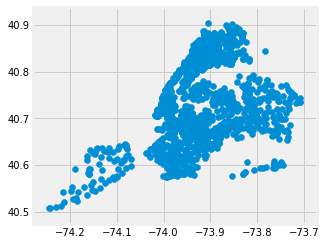

In [84]:
gdf['geometry'].plot()

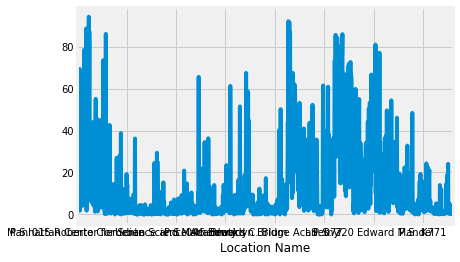

In [77]:
gdf['% Asian'].plot()

In [0]:
k_eight = pd.DataFrame(gdf[gdf['Location Category Description'] == 'K-8'])
secondary = pd.DataFrame(gdf[gdf['Location Category Description'] == 'Secondary School'])
elementary = pd.DataFrame(gdf[gdf['Location Category Description'] == 'Elementary'])
junior_high = pd.DataFrame(gdf[gdf['Location Category Description'] == 'Junior High-Intermediate-Middle'])
k_twelve = pd.DataFrame(gdf[gdf['Location Category Description'] == 'K-12 all grades'])
high_school = pd.DataFrame(gdf[gdf['Location Category Description'] == 'High school'])
early_childhood = pd.DataFrame(gdf[gdf['Location Category Description'] == 'Early Childhood'])
ungraded = pd.DataFrame(gdf[gdf['Location Category Description'] == 'Ungraded'])

In [58]:
elementary.head()

,DBN,School Name,Year,Total Enrollment,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,ATS System Code,Location Category Description,Grades,Open Date,Primary Address,City,State Code,Zip,Principal Name,Geographical District Code,Administrative District Code,Unnamed: 0,system_code,location_code,location_name,primary_address_line_1,geometry
Location Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P.S. 015 Roberto Clemente,01M015,P.S. 015 Roberto Clemente,2017-18,190,99,52.1,91,47.9,20,10.5,52,27.4,110,57.9,2,1.1,6,3.2,45,23.7,8,4.2,161,84.7,89.00%,01M015,Elementary,"0K,01,02,03,04,05,06,SE",Jul 1 1904,333 EAST 4 STREET,MANHATTAN,NY,10009,Thomas Staebell,1,1,709,01M015,M015,P.S. 015 Roberto Clemente,333 EAST 4 STREET,POINT (-73.97875 40.72207)
P.S. 019 Asher Levy,01M019,P.S. 019 Asher Levy,2017-18,257,114,44.4,143,55.6,23,8.9,49,19.1,166,64.6,3,1.2,16,6.2,87,33.9,8,3.1,197,76.7,67.20%,01M019,Elementary,"0K,01,02,03,04,05,SE",Jul 1 1956,185 1 AVENUE,MANHATTAN,NY,10003,Ivan Kushner,1,1,712,01M019,M019,P.S. 019 Asher Levy,185 1 AVENUE,POINT (-73.98450 40.73001)
P.S. 020 Anna Silver,01M020,P.S. 020 Anna Silver,2017-18,497,244,49.1,253,50.9,147,29.6,51,10.3,264,53.1,19,3.8,16,3.2,114,22.9,86,17.3,356,71.6,79.20%,01M020,Elementary,"0K,01,02,03,04,05,SE",Jul 1 1963,166 ESSEX STREET,MANHATTAN,NY,10002,James Lee,1,1,713,01M020,M020,P.S. 020 Anna Silver,166 ESSEX STREET,POINT (-73.98631 40.72131)
P.S. 063 William McKinley,01M063,The STAR Academy - P.S.63,2017-18,203,100,49.3,103,50.7,6,3.0,37,18.2,128,63.1,8,3.9,24,11.8,67,33.0,2,1.0,166,81.8,75.90%,01M063,Elementary,"0K,01,02,03,04,05,SE",Jul 1 1905,121 EAST 3 STREET,MANHATTAN,NY,10009,DARLENE DESPEIGNES,1,1,738,01M063,M063,The STAR Academy - P.S.63,121 EAST 3 STREET,POINT (-73.98621 40.72444)
P.S. 064 Robert Simon,01M064,P.S. 064 Robert Simon,2017-18,245,101,41.2,144,58.8,11,4.5,51,20.8,167,68.2,3,1.2,13,5.3,71,29.0,5,2.0,223,91.0,87.60%,01M064,Elementary,"PK,0K,01,02,03,04,05,SE",Jul 1 1954,600 EAST 6 STREET,MANHATTAN,NY,10009,Marlon L. Hosang,1,1,739,01M064,M064,P.S. 064 Robert Simon,600 EAST 6 STREET,POINT (-73.98160 40.72313)


In [0]:
import seaborn as sns

In [45]:
nycdoe

,geometry
0,"POLYGON ((1002796.091 192779.012, 1003004.900 ..."
1,"POLYGON ((1008702.936 195569.104, 1008399.180 ..."
2,"MULTIPOLYGON (((1006320.818 181792.022, 100628..."
3,"POLYGON ((1006320.818 181792.022, 1006273.423 ..."
4,"POLYGON ((990055.507 196472.349, 990004.946 19..."
5,"POLYGON ((1004601.953 259027.515, 1004617.108 ..."
6,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."
7,"POLYGON ((1006022.270 250527.939, 1006195.639 ..."
8,"MULTIPOLYGON (((1006028.598 231058.796, 100608..."
9,"POLYGON ((1020767.838 268271.133, 1020752.058 ..."


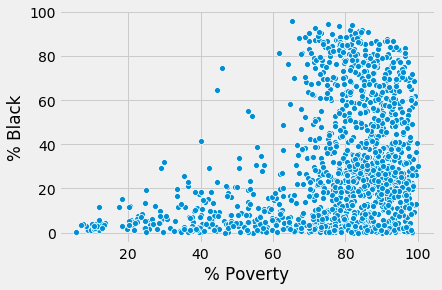

In [44]:
sns.scatterplot(x="% Poverty", y = "% Black",data=gdf);